## Introduction to dataset 

In this task we will use a dataset from the inaturalist.org This dataset contains 500 images of bees that have been uploaded by inaturalist users for the purposes of recording the observation and identification. We only used images that their users have licensed under CC0 license. <br/> **First let's download and unzip the archive.**

In [2]:
!wget http://aws-tc-largeobjects.s3-us-west-2.amazonaws.com/DIG-TF-200-MLBEES-10-EN/dataset.zip 
!unzip -qo dataset.zip

--2020-12-31 19:47:16--  http://aws-tc-largeobjects.s3-us-west-2.amazonaws.com/DIG-TF-200-MLBEES-10-EN/dataset.zip
Resolving aws-tc-largeobjects.s3-us-west-2.amazonaws.com (aws-tc-largeobjects.s3-us-west-2.amazonaws.com)... 52.218.178.25
Connecting to aws-tc-largeobjects.s3-us-west-2.amazonaws.com (aws-tc-largeobjects.s3-us-west-2.amazonaws.com)|52.218.178.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70375947 (67M) [application/x-zip-compressed]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]  67.12M  9.13MB/s    in 8.0s    

2020-12-31 19:47:24 (8.40 MB/s) - ‘dataset.zip’ saved [70375947/70375947]



The archive contains the following structure: 500 .jpg image files, a manifest file and 10 test images in the test subfolder.

In [3]:
!unzip -l dataset.zip | tail -20

   251027  05-15-2019 19:21   9530124.jpg
   110561  05-15-2019 19:21   9542264.jpg
   312354  05-15-2019 19:21   9543188.jpg
    76903  05-15-2019 19:21   9637165.jpg
    48663  05-15-2019 19:21   9765741.jpg
    66393  05-15-2019 19:21   9787032.jpg
   273392  05-22-2019 21:58   output.manifest
        0  06-01-2019 05:51   test/
    83438  06-01-2019 05:51   test/22427594.jpg
   152133  06-01-2019 05:51   test/22469656.jpg
   205930  06-01-2019 05:51   test/22544384.jpg
   137755  06-01-2019 05:51   test/22673445.jpg
   124565  06-01-2019 05:51   test/22741822.jpg
    39502  06-01-2019 05:51   test/22774999.jpg
    39086  06-01-2019 05:51   test/22775000.jpg
   149389  06-01-2019 05:51   test/22901964.jpg
   103322  06-01-2019 05:51   test/22971237.jpg
   109178  06-01-2019 05:51   test/23086755.jpg
---------                     -------
 70635014                     512 files


In [1]:
import sagemaker
from sagemaker import get_execution_role

role = get_execution_role()
print(role)
sess = sagemaker.Session()
BUCKET = sess.default_bucket()
PREFIX = 'input'

arn:aws:iam::166608666073:role/service-role/AmazonSageMaker-ExecutionRole-20201127T164560


In [6]:
!aws s3 sync --exclude="*" --include="[0-9]*.jpg" . s3://$BUCKET/$PREFIX/

upload: ./10022723.jpg to s3://sagemaker-us-east-1-166608666073/input/10022723.jpg  
upload: ./10006450.jpg to s3://sagemaker-us-east-1-166608666073/input/10006450.jpg  
upload: ./10059108.jpg to s3://sagemaker-us-east-1-166608666073/input/10059108.jpg  
upload: ./10250726.jpg to s3://sagemaker-us-east-1-166608666073/input/10250726.jpg    
upload: ./10299519.jpg to s3://sagemaker-us-east-1-166608666073/input/10299519.jpg    
upload: ./1025450.jpg to s3://sagemaker-us-east-1-166608666073/input/1025450.jpg      
upload: ./10311147.jpg to s3://sagemaker-us-east-1-166608666073/input/10311147.jpg    
upload: ./1063563.jpg to s3://sagemaker-us-east-1-166608666073/input/1063563.jpg      
upload: ./10631806.jpg to s3://sagemaker-us-east-1-166608666073/input/10631806.jpg    
upload: ./10551061.jpg to s3://sagemaker-us-east-1-166608666073/input/10551061.jpg  
upload: ./10437385.jpg to s3://sagemaker-us-east-1-166608666073/input/10437385.jpg  
upload: ./10658023.jpg to s3://sagemaker-us-east-1-16

## Labels

In [2]:
labeling_job_name = 'bees-500'
augmented_manifest_file = 'output.manifest'

Now let's see the first few lines of the manifest file

In [10]:
#replacing bucket name and prefix to right format
outputManifest = open("output.manifest", "rt")
#read file contents to string
manifest = outputManifest.read()
#replace all occurrences of the required string
replaceStr = BUCKET + '/' + PREFIX
manifest = manifest.replace('sagemaker-remars/datasets/na-bees/500', replaceStr)
#close the input file
outputManifest.close()
#open the input file in write mode
outputManifest = open("output.manifest", "wt")
#overrite the input file with the resulting data
outputManifest.write(manifest)
#close the file
outputManifest.close()

In [3]:
!head -2 $augmented_manifest_file

{"source-ref":"s3://sagemaker-us-east-1-166608666073/input/10006450.jpg","bees-500":{"annotations":[{"class_id":0,"width":95.39999999999998,"top":256.2,"height":86.80000000000001,"left":177}],"image_size":[{"width":500,"depth":3,"height":500}]},"bees-500-metadata":{"job-name":"labeling-job/bees-500","class-map":{"0":"bee"},"human-annotated":"yes","objects":[{"confidence":0.75}],"creation-date":"2019-05-16T00:15:58.914553","type":"groundtruth/object-detection"}}
{"source-ref":"s3://sagemaker-us-east-1-166608666073/input/10022723.jpg","bees-500":{"annotations":[{"class_id":0,"width":93.8,"top":228.8,"height":135,"left":126.8}],"image_size":[{"width":375,"depth":3,"height":500}]},"bees-500-metadata":{"job-name":"labeling-job/bees-500","class-map":{"0":"bee"},"human-annotated":"yes","objects":[{"confidence":0.82}],"creation-date":"2019-05-16T00:41:33.384412","type":"groundtruth/object-detection"}}


Now let's plot all the annotated images. First, let's define a function that displays the local image file and draws over it the bounding boxes obtained via labeling.

In [4]:
import os
import boto3
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
from itertools import cycle

def show_annotated_image(img_path, bboxes):
    im = np.array(Image.open(img_path), dtype=np.uint8)
    
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(im)

    colors = cycle(['r', 'g', 'b', 'y', 'c', 'm', 'k', 'w'])
    
    for bbox in bboxes:
        # Create a Rectangle patch
        rect = patches.Rectangle((bbox['left'],bbox['top']),bbox['width'],bbox['height'],linewidth=1,edgecolor=next(colors),facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

Next, read the augmented manifest (JSON lines format) line by line and display the first 10 images.

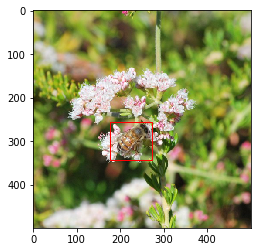

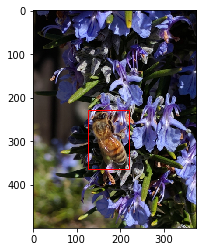

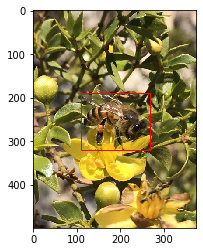

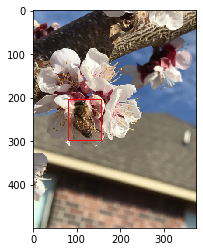

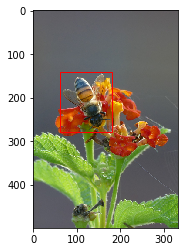

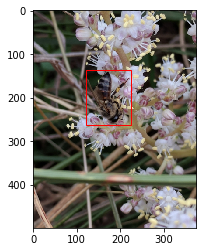

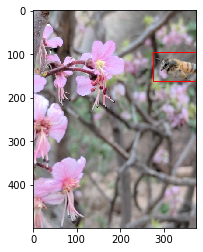

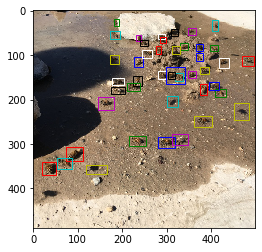

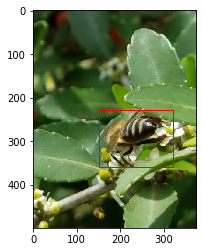

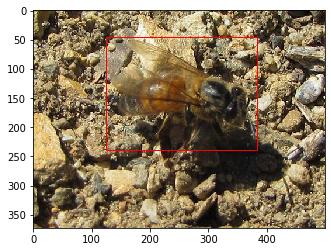

In [5]:
!pip -q install --upgrade pip
!pip -q install jsonlines
import jsonlines
from itertools import islice

with jsonlines.open(augmented_manifest_file, 'r') as reader:
    for desc in islice(reader, 10):
        img_url = desc['source-ref']
        img_file = os.path.basename(img_url)
        file_exists = os.path.isfile(img_file)

        bboxes = desc[labeling_job_name]['annotations']
        show_annotated_image(img_file, bboxes)

## Training an Object Detection Model
We are now ready to use the labeled dataset in order to train a Machine Learning model using the SageMaker built in object detection algorithm

For this, we would need to split the full labeled dataset into a training and a validation datasets. Out of the total of 500 images we are going to use 400 for training and 100 for validation. 

In [12]:
import json

with jsonlines.open('output.manifest', 'r') as reader:
    lines = list(reader)
    # Shuffle data in place.
    np.random.shuffle(lines)
    
dataset_size = len(lines)
num_training_samples = round(dataset_size*0.8)

train_data = lines[:num_training_samples]
validation_data = lines[num_training_samples:]

augmented_manifest_filename_train = 'train.manifest'

with open(augmented_manifest_filename_train, 'w') as f:
    for line in train_data:
        f.write(json.dumps(line))
        f.write('\n')

augmented_manifest_filename_validation = 'validation.manifest'

with open(augmented_manifest_filename_validation, 'w') as f:
    for line in validation_data:
        f.write(json.dumps(line))
        f.write('\n')
        
print(f'training samples: {num_training_samples}, validation samples: {len(lines)-num_training_samples}')

training samples: 400, validation samples: 100


Next, let's upload the two manifest files to S3 in preparation for training. We will use the same bucket you created earlier.

In [13]:
pfx_training = PREFIX + '/training' if PREFIX else 'training'
# Defines paths for use in the training job request.
s3_train_data_path = 's3://{}/{}/{}'.format(BUCKET, pfx_training, augmented_manifest_filename_train)
s3_validation_data_path = 's3://{}/{}/{}'.format(BUCKET, pfx_training, augmented_manifest_filename_validation)

!aws s3 cp train.manifest s3://$BUCKET/$pfx_training/
!aws s3 cp validation.manifest s3://$BUCKET/$pfx_training/

upload: ./train.manifest to s3://sagemaker-us-east-1-166608666073/input/training/train.manifest
upload: ./validation.manifest to s3://sagemaker-us-east-1-166608666073/input/training/validation.manifest


Next we define an output location in S3, where the model artifacts will be placed on completion of the training. These artifacts are the output of the algorithm's traning job. We also get the URI to the Amazon SageMaker Object Detection docker image. This ensures the estimator uses the correct algorithm from the current region.

In [14]:
from sagemaker.amazon.amazon_estimator import get_image_uri

training_image = get_image_uri(sess.boto_region_name, 'object-detection', repo_version='latest')
print (training_image)

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: latest.


811284229777.dkr.ecr.us-east-1.amazonaws.com/object-detection:1


In [15]:
s3_output_location = 's3://sagemaker-us-east-1-166608666073/input/output'

In [33]:
odmodel = sagemaker.estimator.Estimator(training_image,
                                         role, 
                                         train_instance_count=1, 
                                         train_instance_type='ml.p2.xlarge',
                                         train_volume_size = 50,
                                         train_max_run = 360000,
                                         input_mode= 'Pipe',
                                         output_path=s3_output_location,
                                         sagemaker_session=sess)

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_max_run has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_volume_size has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


Now let's define hyperparameters

In [34]:
odmodel.set_hyperparameters(base_network='resnet-50',
                                 use_pretrained_model=1,
                                 num_classes=1,
                                 mini_batch_size=1,
                                 epochs=100,               
                                 learning_rate=0.001,      
                                 lr_scheduler_factor=0.1,
                                 optimizer='sgd',
                                 momentum=0.9,
                                 weight_decay=0.0005,
                                 overlap_threshold=0.5,
                                 nms_threshold=0.45,
                                 image_shape=300,
                                 label_width=350,
                                 num_training_samples=400,
                                 early_stopping=True,
                                 early_stopping_min_epochs=40,
                                 early_stopping_patience=5,
                                 early_stopping_tolerance=0.01)

Now that the hyperparameters are setup, we define the data channels to be passed to the algorithm. 

In [30]:
train_data = sagemaker.session.s3_input(s3_train_data_path,
                                        distribution='FullyReplicated',
                                        s3_data_type='AugmentedManifestFile',
                                        attribute_names=['source-ref', 'bees-500'],
                                        input_mode='Pipe',
                                        record_wrapping='RecordIO')

The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [31]:
validation_data = sagemaker.session.s3_input(s3_validation_data_path,
                                        distribution='FullyReplicated',
                                        s3_data_type='AugmentedManifestFile',
                                        attribute_names=['source-ref', 'bees-500'],
                                        input_mode='Pipe',
                                        record_wrapping='RecordIO')

The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [32]:
data_channels = {'train': train_data, 'validation': validation_data}

Now let's submit the training job

In [35]:
odmodel.fit(inputs=data_channels, logs=True)

2021-01-01 14:15:44 Starting - Starting the training job...
2021-01-01 14:16:09 Starting - Launching requested ML instancesProfilerReport-1609510544: InProgress
......
2021-01-01 14:17:15 Starting - Preparing the instances for training............
2021-01-01 14:19:11 Downloading - Downloading input data
2021-01-01 14:19:11 Training - Downloading the training image......
2021-01-01 14:20:11 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
[01/01/2021 14:20:12 INFO 139831482427200] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/default-input.json: {u'label_width': u'350', u'early_stopping_min_epochs': u'10', u'epochs': u'30', u'overlap_threshold': u'0.5', u'lr_scheduler_factor': u'0.1', u'_num_kv_servers': u'auto', u'weight_decay': u'0.0005', u'mini_batch_size': u'32', u'use_pretrained_model': u'0', u'freeze_layer_pattern': u'', u'lr_scheduler_step': u'', u'early_stopping': u'False', 

Now let's assure that the job was finished without any problem

In [41]:
import boto3
client = boto3.client('sagemaker')

training_job_name = 'object-detection-2021-01-01-14-15-44-450'

training_info = client.describe_training_job(TrainingJobName=training_job_name)

print("Training job status: ", training_info['TrainingJobStatus'])
print("Secondary status: ", training_info['SecondaryStatus'])

Training job status:  Completed
Secondary status:  Completed


## Training results review

First, let's create the SageMaker model out of model artifacts

In [43]:
import time
timestamp = time.strftime('-%Y-%m-%d-%H-%M-%S', time.gmtime())
model_name = training_job_name + '-model' 

training_image = training_info['AlgorithmSpecification']['TrainingImage']
model_data = training_info['ModelArtifacts']['S3ModelArtifacts']

primary_container = {
    'Image': training_image,
    'ModelDataUrl': model_data,
}

from sagemaker import get_execution_role

role = get_execution_role()

create_model_response = client.create_model(
    ModelName = model_name,
    ExecutionRoleArn = role,
    PrimaryContainer = primary_container)

print(create_model_response['ModelArn'])

arn:aws:sagemaker:us-east-1:166608666073:model/object-detection-2021-01-01-14-15-44-450-model


In [45]:
timestamp = time.strftime('-%Y-%m-%d-%H-%M-%S', time.gmtime())
endpoint_config_name = training_job_name + '-epc'
endpoint_config_response = client.create_endpoint_config(
    EndpointConfigName = endpoint_config_name,
    ProductionVariants=[{
        'InstanceType':'ml.t2.medium',
        'InitialInstanceCount':1,
        'ModelName':model_name,
        'VariantName':'AllTraffic'}])

print('Endpoint configuration name: {}'.format(endpoint_config_name))
print('Endpoint configuration arn:  {}'.format(endpoint_config_response['EndpointConfigArn']))

Endpoint configuration name: object-detection-2021-01-01-14-15-44-450-epc
Endpoint configuration arn:  arn:aws:sagemaker:us-east-1:166608666073:endpoint-config/object-detection-2021-01-01-14-15-44-450-epc


## Create Endpoint

In [46]:
timestamp = time.strftime('-%Y-%m-%d-%H-%M-%S', time.gmtime())
endpoint_name = training_job_name + '-ep' 
print('Endpoint name: {}'.format(endpoint_name))

endpoint_params = {
    'EndpointName': endpoint_name,
    'EndpointConfigName': endpoint_config_name,
}
endpoint_response = client.create_endpoint(**endpoint_params)
print('EndpointArn = {}'.format(endpoint_response['EndpointArn']))

# get the status of the endpoint
response = client.describe_endpoint(EndpointName=endpoint_name)
status = response['EndpointStatus']
print('EndpointStatus = {}'.format(status))

Endpoint name: object-detection-2021-01-01-14-15-44-450-ep
EndpointArn = arn:aws:sagemaker:us-east-1:166608666073:endpoint/object-detection-2021-01-01-14-15-44-450-ep
EndpointStatus = Creating


## Perform inference

We will invoke the deployed endpoint to detect bees in the 10 test images that were inside the test folder in dataset.zip

In [47]:
import glob
test_images = glob.glob('test/*')
print(*test_images, sep="\n")

test/22544384.jpg
test/22774999.jpg
test/22901964.jpg
test/22469656.jpg
test/22427594.jpg
test/22673445.jpg
test/22971237.jpg
test/22775000.jpg
test/22741822.jpg
test/23086755.jpg


Next, define a function that converts the prediction array returned by our endpoint to the bounding box structure expected by our image display function.

In [48]:
def prediction_to_bbox_data(image_path, prediction):
    class_id, confidence, xmin, ymin, xmax, ymax = prediction
    width, height = Image.open(image_path).size
    bbox_data = {'class_id': class_id,
               'height': (ymax-ymin)*height,
               'width': (xmax-xmin)*width,
               'left': xmin*width,
               'top': ymin*height}
    return bbox_data

Finally, for each of the test images, the following cell transforms the image into the appropriate format for realtime prediction, repeatedly calls the endpoint, receives back the prediction, and displays the result.

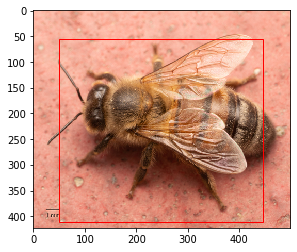

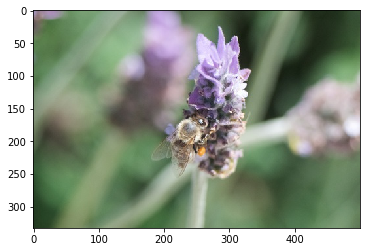

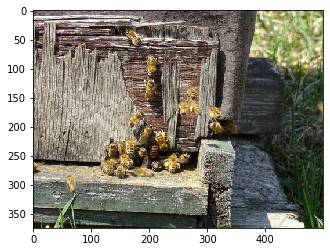

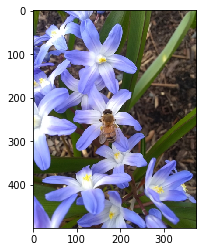

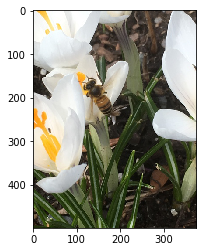

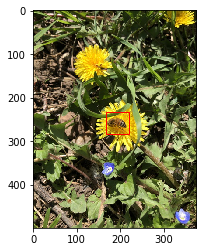

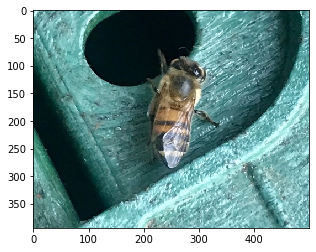

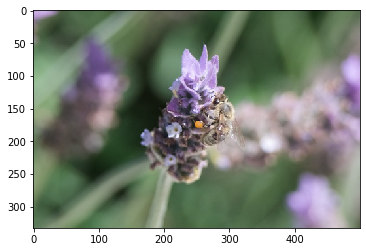

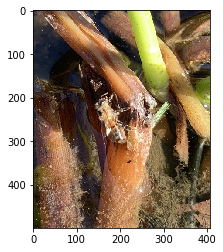

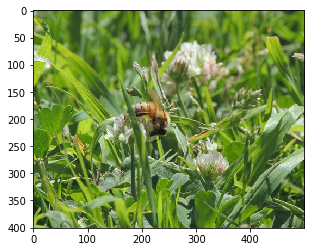

In [51]:
import matplotlib.pyplot as plt

endpoint_name='object-detection-2021-01-01-14-15-44-450-ep'

runtime_client = boto3.client('sagemaker-runtime')

# Call SageMaker endpoint to obtain predictions
def get_predictions_for_img(runtime_client, endpoint_name, img_path):
    with open(img_path, 'rb') as f:
        payload = f.read()
        payload = bytearray(payload)

    response = runtime_client.invoke_endpoint(EndpointName=endpoint_name, 
                                       ContentType='application/x-image', 
                                       Body=payload)

    result = response['Body'].read()
    result = json.loads(result)
    return result


# wait until the status has changed
client.get_waiter('endpoint_in_service').wait(EndpointName=endpoint_name)
endpoint_response = client.describe_endpoint(EndpointName=endpoint_name)
status = endpoint_response['EndpointStatus']
if status != 'InService':
    raise Exception('Endpoint creation failed.')

for test_image in test_images:
    result = get_predictions_for_img(runtime_client, endpoint_name, test_image)
    confidence_threshold = .5
    best_n = 1
    # display the best n predictions with confidence > confidence_threshold
    predictions = [prediction for prediction in result['prediction'] if prediction[1] > confidence_threshold]
    predictions.sort(reverse=True, key = lambda x: x[1])
    bboxes = [prediction_to_bbox_data(test_image, prediction) for prediction in predictions[:best_n]]
    show_annotated_image(test_image, bboxes)

## Cleanup

In [ ]:
#Finally we will delete the endpoint
client.delete_endpoint(EndpointName=endpoint_name)